##Credit Card Fraud Detection  
                                                                                   Developer --> Sudhasrinivas
Problem Statement In this project we will predict fraudulent credit card transactions with the help of Machine learning models.

In order to complete the project, we are going to follow below high level steps to build and select best model.

    1) Read the creditcard dataset

    2) Perform exploratory data analysis

    3) Building different classification models on the unbalanced data

    4) Building different models on 4 different balancing technique.

        a. Random Oversampling

        b. SMOTE

        c. ADASYN

        d. Random Undersampling

In [2]:
#Mount google drive if using colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change the path as per your system
path='/content/drive/MyDrive/CCAssignment/creditcard data.zip'

In [3]:
# All required libraries are imported here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [4]:
from collections import Counter

In [5]:
# importing libraries required for model building and metrics
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

import xgboost as xgb


## Exploratory data analysis

In [6]:
# Read the data set and explore
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Basic Analysis on dataset

In [7]:
#Observe the size and shape
df.shape

(284807, 31)

In [8]:
#Basic Info about dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#Basic stats about dataset columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

### Now we will see distribution of data.

In [10]:
#Check the fraud/Non_Fraud related records
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.2f%%' % (k, v, per))

Class=0, Count=284315, Percentage=99.83%
Class=1, Count=492, Percentage=0.17%


In [11]:
#percentage of fraud/Non Fraud in dataset
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("Non-Fraud Transactions:",normal_share)
print("Fraud Tranactions:",fraud_share)

Non-Fraud Transactions: 99.82725143693798
Fraud Tranactions: 0.1727485630620034


From the data distribution we can see dataset is highly imbalanced. Fraud transactions are just 0.17% of total data. 

## Univarient and Bivarient Analysis

### Bar Plot to understand ratio of Non-Fraud to Fraud transactions

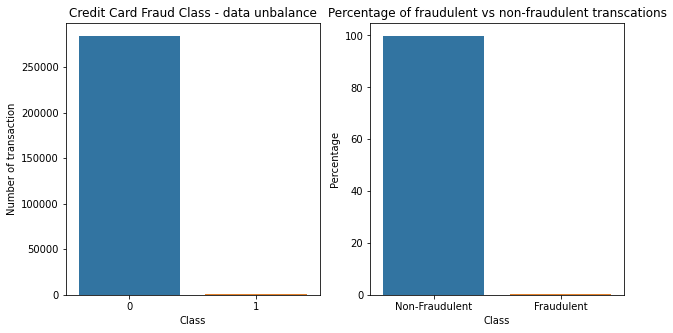

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

### Scatter plot to observe the distribution of classes with time

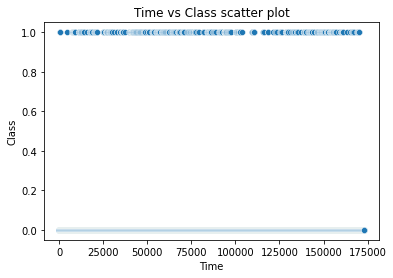

In [13]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

### Scatter plot to observe the distribution of classes with Amount


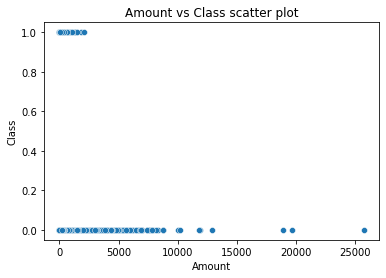

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

### Correlation between dependent variable with other independent variable

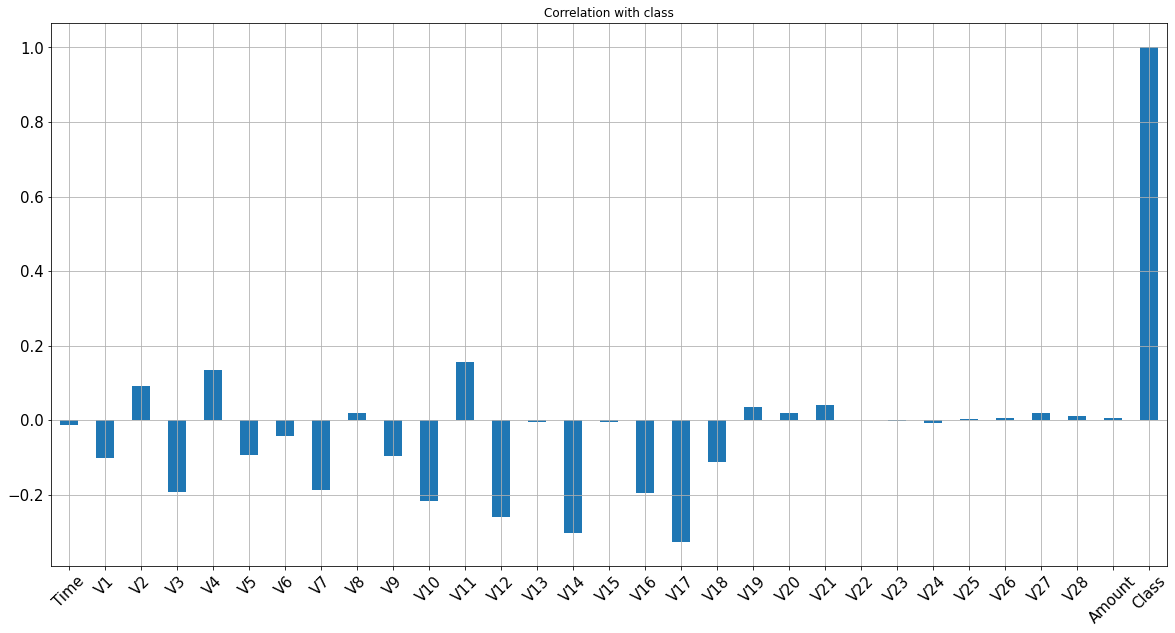

In [15]:
df.corrwith(df.Class).plot.bar(figsize = (20, 10), title = "Correlation with class", fontsize = 15,rot = 45, grid = True)
plt.show()

From the plot we can see that **V17, V14, V12 and v10 ** are highly correlated and are negatively correlated

In [16]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413


Features V11, V4, V2, V21 are most relative to target variable Class

In [17]:
## Correlation Matrix
# Compute the correlation matrix
corr = df.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447


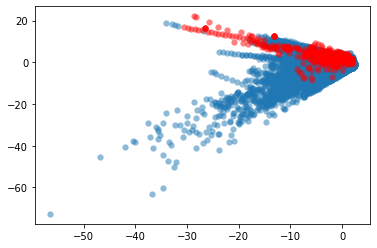

In [18]:
# Plot how fraud and non-fraud cases are scattered 
plt.scatter(df.loc[df['Class'] == 0]['V1'], df.loc[df['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.loc[df['Class'] == 1]['V1'], df.loc[df['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()

Distribution of class 1 (Fraud case) is represented by red dots  and class 0 (Non Fraud case)is represented by blue dots

### Observe statistical difference between Fraud and Non Fraud cases

In [19]:
# Seperate total data into non-fraud and fraud cases
df_nonfraud = df[df.Class == 0] #save non-fraud df observations into a separate df
df_fraud = df[df.Class == 1] #do the same for frauds

In [20]:
# Summarize statistics and see differences between fraud and normal transactions
print(df_nonfraud.Amount.describe())
print('_'*25)
print(df_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
_________________________
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


### Summary:
The mean transaction amout among fraud cases is 122 USD, and is 88 among non-fraud cases. And the difference is statistically significant.

### Distribution of Fraud cases vs Non Fraud in case of high amount transactions

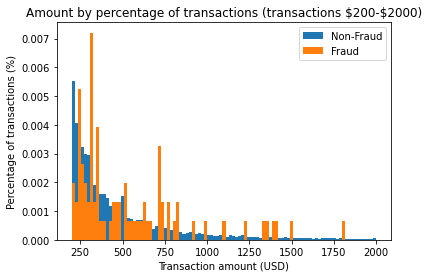

In [21]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

### Observation:
In the long tail, fraud transaction happened more frequently.
It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.

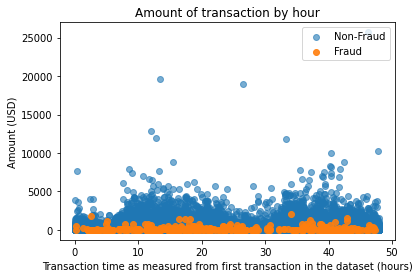

In [22]:
plt.scatter((df_nonfraud.Time/(60*60)), df_nonfraud.Amount, alpha=0.6, label='Non-Fraud')
plt.scatter((df_fraud.Time/(60*60)), df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

It is not enough to make a good classifier.
For example, it would be hard to draw a line that cleanly separates fraud and non-fraud transactions

### Distribution of Fraud and Non Fraud case with respect to Time

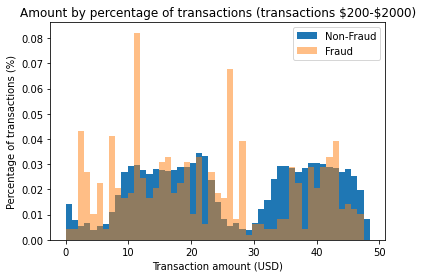

In [23]:
# Plot to find out what time of hour of the day is more susceptible for frauds to occur
bins = np.linspace(0,48.48)
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()


It seems fraud tends to occur at higher rates during the night.
Statistical tests could be used to give evidence for this fact.

### Distribution of Fraud and Non Fraud case with respect to different columns

<Figure size 432x288 with 0 Axes>

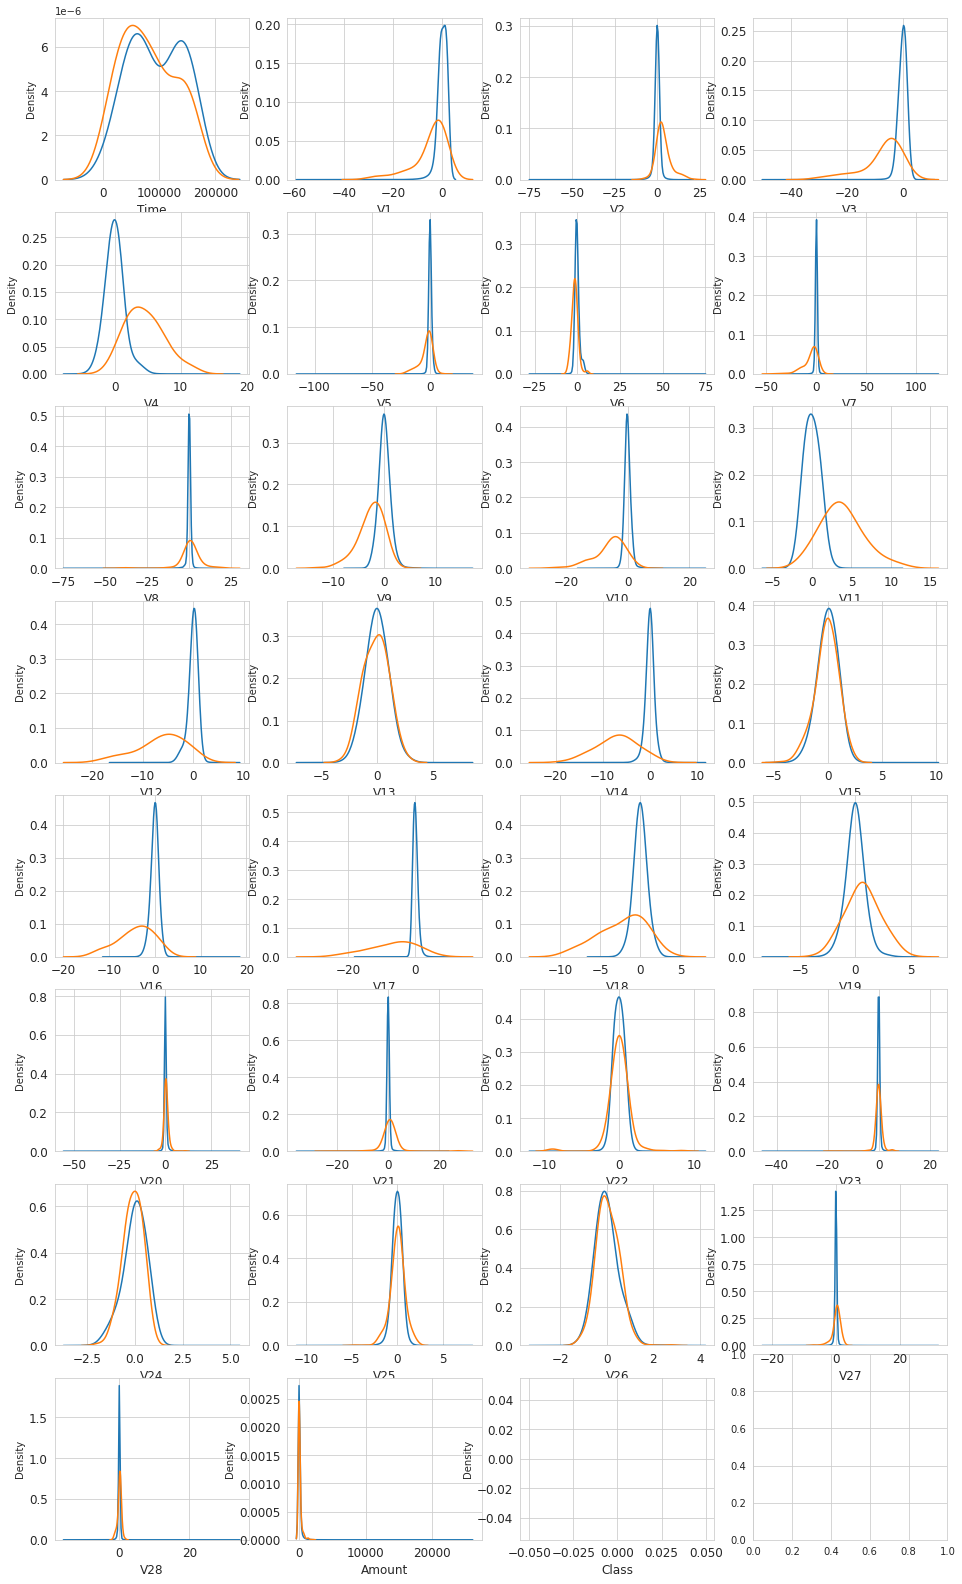

In [24]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

## Observation:
* Fraud transactions are represented by orange and Non Fraud with Blue. 
* Fraud transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.
* Distribution of data for Fraud case is distributed evenly around zero.
* V6, V13, V15, V20, V22, V23, V24, V25 and V26 have same distribution of data for Faud and Non Fraud Case.

In [25]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since no field have null value thus no imputation strategy required in this case.

#### As We notice, the variable ‘Amount’ ranges from 0 to 25,691.16. To reduce its wide range, we use Standardization to remove the mean and scale to unit variance, so that 68% of the values lie in between (-1, 1).

#### We see only Time and Amount are the actual fields are all other are PCA. We need to scale these filed to normalize. As from the univarient and bivarient analysis Time is not contrubuting much in analysis as it was evenly distributed across the classes. We scale only Amount field and drop the Time field 

In [26]:

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"

df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
#df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Drop unnecessary columns
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579


### Splitting the data into train & test data

In [27]:
#class variable
y = df_scaled[['Class']] 
X = df_scaled.drop(['Class'],axis=1, inplace=False) 

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [28]:
# 30% data is selected for test and rest 70 % for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [29]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

Class    492
dtype: int64
Class    345
dtype: int64
Class    147
dtype: int64


### Plotting the distribution of a variable

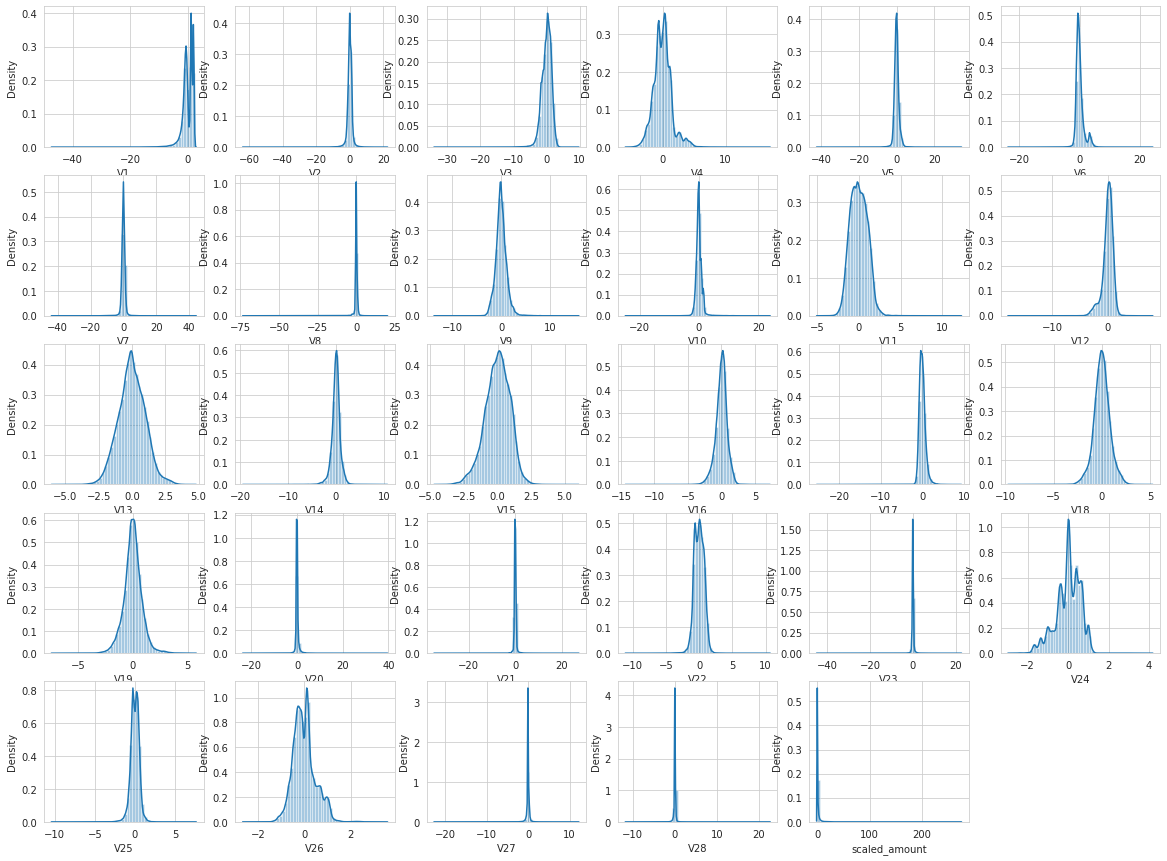

In [30]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [31]:
df.columns
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount']

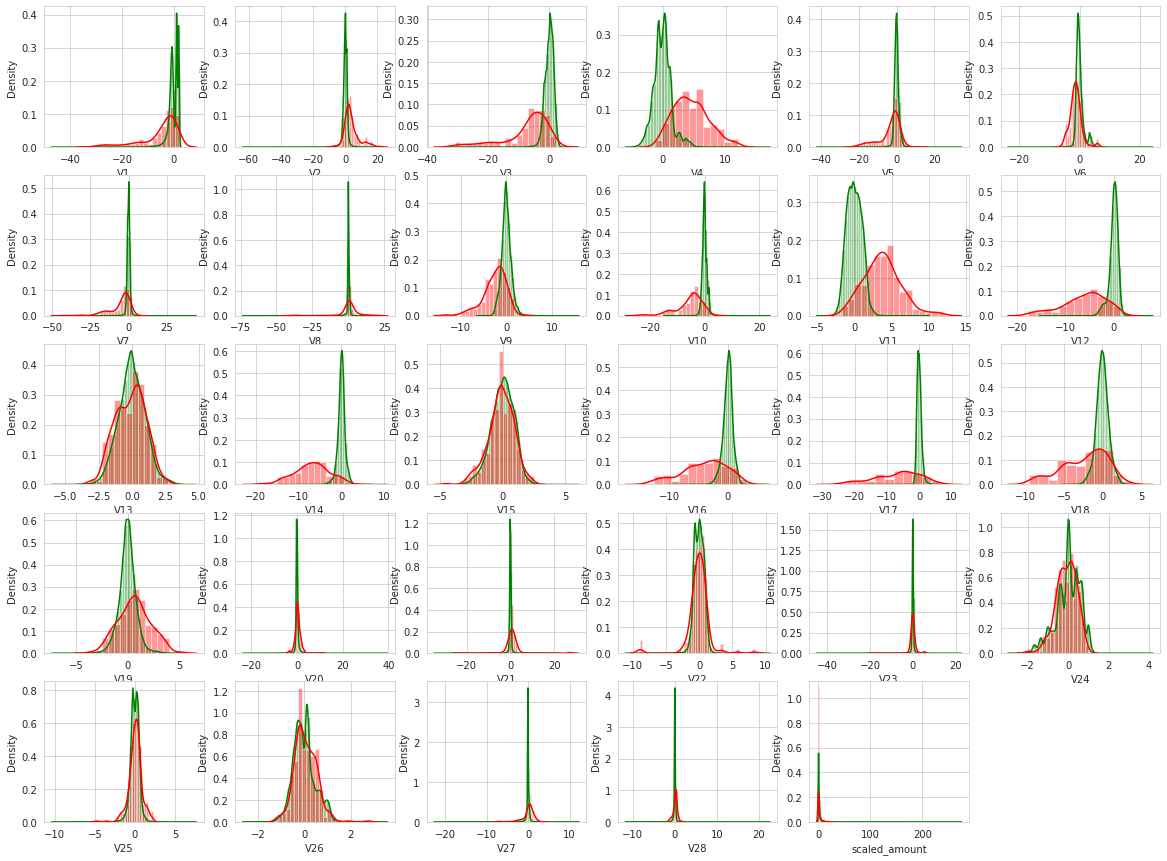

In [32]:
X_train_df = pd.DataFrame(data = X_train, columns= cols)
plt.figure(figsize = (20,15))
for n, col in enumerate(cols):
    plt.subplot(5,6,n+1)
    sns.distplot(X_train_df[col][df.Class== 0], color = 'green')
    sns.distplot(X_train_df[col][df.Class== 1], color = 'red')
    #plt.title(col, fontsize =17)
plt.show()

V4, V11 have clearly separated distributions for Class values 0 and 1

V12, V14, V18 are partially separated

V1, V2, V3, V10 have a quite distinct profile, while V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for Non Fraud transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. 

In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

### Since there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [33]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
## We are using PowerTransformer to perform a Yeo-Johnson power transformation on our X-data
## in order to ensure that our features are normally distributed. 
transformer = PowerTransformer()
transformer.fit(X_train)
# PowerTransformer requires a matrix/DataFrame
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

###  Distribution of data after Power transform just to ensure if distribution is more normally distributed(Gaussian)

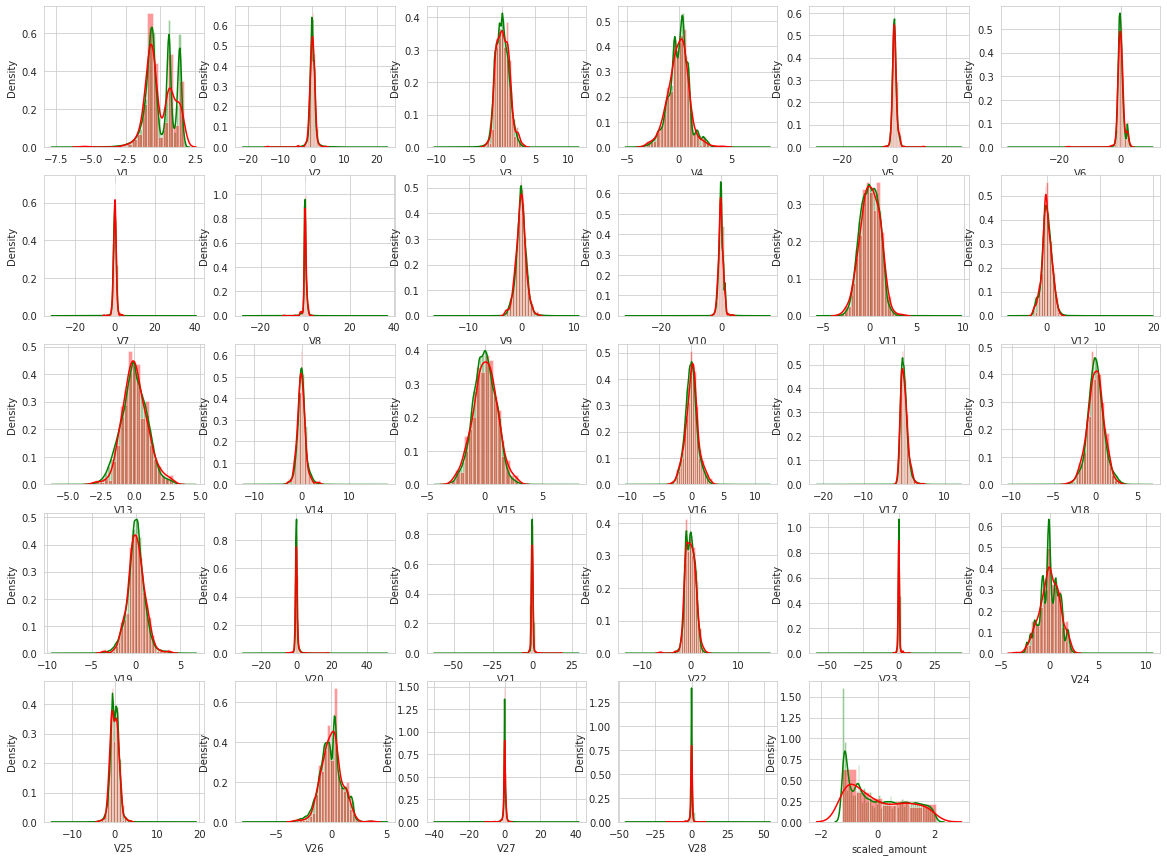

In [34]:
#Plot to see the distriubution after power transformation
X_train_pt_df = pd.DataFrame(data = X_train, columns= cols)
plt.figure(figsize = (20,15))
for n, col in enumerate(cols):
    plt.subplot(5,6,n+1)
    sns.distplot(X_train_pt_df[col][df.Class== 0], color = 'green')
    sns.distplot(X_train_pt_df[col][df.Class== 1], color = 'red')
    #plt.title(col, fontsize =17)
plt.show()

## Model Building On Imbalanced Dataset
- We are going to build models on below mentioned algorithms and we will compare for the best model. We are not building models on SVM,  KNN as these algorithms are computationaly expensive and need more computational resources specially for the SVM and KNN. 
KNN algorithms calculate distance between each data points and then this calculation iterates for all the data points to calcualte the nearest neighbour. This process is computationally very expensive when we have very large data set. We do not have these resource available so we are skipping these models. - Logistic Regression - Decision Tree - RandomForest - XGBoost

- Metric selection on imbalance data
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

## Utility Methods

In [35]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                           drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [36]:
# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.figure(figsize=(5, 5))
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

In [37]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"\nClassification Report: \n {classification_report(y_test, y_pred)}")
    print(f'\nConfusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_pred))

## Model 1 : Logistic Regression on unbalanced dataset

In [38]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.2s finished


Best ROC AUC score:  0.977712657169128
Best hyperparameters:  {'C': 0.01}


In [39]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.991896,0.032175,0.024771,0.000805,0.01,{'C': 0.01},0.987707,0.986362,0.972757,0.951697,0.990042,0.977713,0.014339,1,0.982533,0.982172,0.980089,0.987156,0.979752,0.982340,0.002647
1,1.455398,0.101788,0.024992,0.000748,0.1,{'C': 0.1},0.984319,0.981892,0.971299,0.949290,0.989213,0.975203,0.014219,2,0.981855,0.981362,0.977676,0.985624,0.977363,0.980776,0.003042
2,1.480508,0.078849,0.025578,0.000940,1,{'C': 1},0.983011,0.980110,0.970867,0.948577,0.988405,0.974194,0.014014,3,0.981316,0.980802,0.976935,0.984895,0.976444,0.980078,0.003110
3,1.512768,0.052912,0.025897,0.000632,10,{'C': 10},0.982844,0.979887,0.970820,0.948476,0.988286,0.974062,0.013989,4,0.981246,0.980727,0.976844,0.984803,0.976331,0.979990,0.003117
4,1.480147,0.080503,0.024779,0.000988,100,{'C': 100},0.982828,0.979861,0.970810,0.948460,0.988276,0.974047,0.013990,5,0.981241,0.980719,0.976836,0.984794,0.976321,0.979982,0.003117
5,1.448372,0.094622,0.023799,0.004543,1000,{'C': 1000},0.982826,0.979858,0.970809,0.948459,0.988276,0.974045,0.013990,6,0.981240,0.980719,0.976835,0.984793,0.976319,0.979981,0.003117


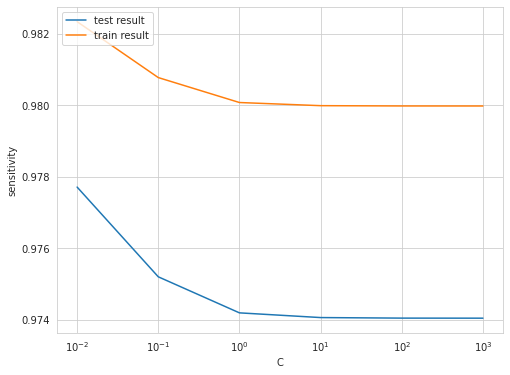

In [40]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

Logistic Regression with optimal C

In [41]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction and model evalution on the train set

In [42]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [43]:
display_scores(y_train, y_train_pred)

F1 Score: 71.97%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       0.89      0.60      0.72       345

    accuracy                           1.00    199364
   macro avg       0.95      0.80      0.86    199364
weighted avg       1.00      1.00      1.00    199364


Confusion matrix:
 [[198994     25]
 [   137    208]]


In [44]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

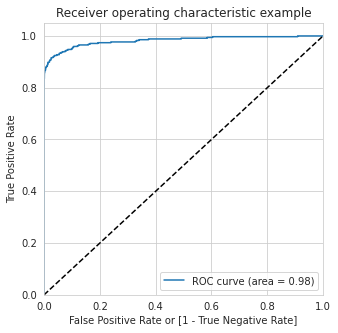

In [45]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Evaluating the model on the test set

In [46]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 69.96%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.58      0.70       147

    accuracy                           1.00     85443
   macro avg       0.94      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[85285    11]
 [   62    85]]


In [47]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

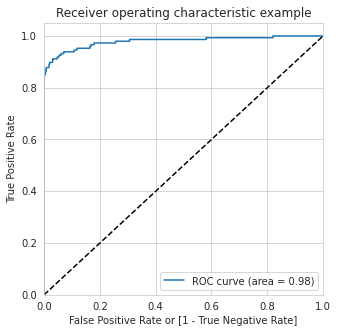

In [48]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [49]:
# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_test_pred)

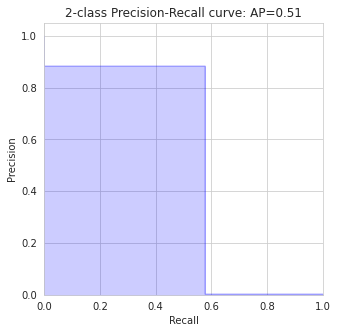

In [50]:
# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### Model Summary

- Train set
    - ROC : 98%
    - F1 Score: 71.97%
    
- Test set
    - ROC : 98%
    - F1 score: 69.96%

##Model 2: Decision Tree on unbalanced dataset

In [51]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [52]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.534111,0.046101,0.032879,0.001334,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.921273,0.944043,0.940892,0.935403,0.010074,5
1,4.560995,0.061576,0.033653,0.001763,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.921272,0.944055,0.940849,0.935392,0.010069,6
2,4.510492,0.070603,0.034186,0.001562,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.951532,0.943883,0.949316,0.948244,0.003214,2
3,4.534330,0.097000,0.034290,0.001108,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.951532,0.943888,0.949316,0.948245,0.003211,1
4,8.776903,0.082441,0.035308,0.001003,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.930280,0.939642,0.947354,0.939092,0.006981,3
5,8.848385,0.055403,0.039267,0.005790,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.930213,0.931179,0.947396,0.936263,0.007883,4
6,8.655515,0.045430,0.035571,0.000561,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932855,0.909349,0.951191,0.931132,0.017125,7
7,8.823472,0.056651,0.032482,0.006688,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932876,0.909367,0.942747,0.928330,0.014001,8


In [53]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9482453225736384
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### Decision Tree with optimal hyperparameters

In [54]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

#### Prediction on the train set

In [55]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 73.0%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       0.76      0.70      0.73       345

    accuracy                           1.00    199364
   macro avg       0.88      0.85      0.86    199364
weighted avg       1.00      1.00      1.00    199364


Confusion matrix:
 [[198943     76]
 [   103    242]]


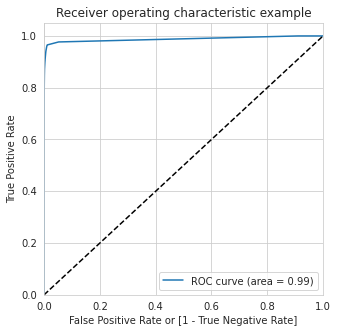

In [56]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [57]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 70.71%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.74      0.67      0.71       147

    accuracy                           1.00     85443
   macro avg       0.87      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[85262    34]
 [   48    99]]


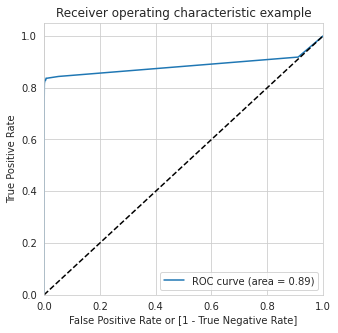

In [58]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC : 99%
    - F1 Score: 73.0%
    
- Test set
    - ROC : 89%
    - F1 score: 70.71%

## Model 3: Random Forest on unbalanced data 

In [59]:
# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Fit a logistic regression model to our data
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=5,
                                   

In [60]:
# cv results
cv_results = pd.DataFrame(CV_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.597852,0.014578,0.032126,0.002938,gini,4,auto,1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.623188,0.666667,0.753623,0.623188,0.550725,0.643478,0.066477,15
1,15.756449,0.143711,0.106291,0.004606,gini,4,auto,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.623188,0.710145,0.753623,0.724638,0.608696,0.684058,0.057535,11
2,0.475730,0.005543,0.028979,0.000496,gini,4,log2,1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.550725,0.695652,0.637681,0.623188,0.536232,0.608696,0.058691,16
3,12.746405,0.126466,0.104854,0.003884,gini,4,log2,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.623188,0.695652,0.724638,0.710145,0.550725,0.660870,0.065201,14
4,1.118920,0.044686,0.033653,0.002983,gini,8,auto,1,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.608696,0.623188,0.753623,0.652174,0.681159,0.663768,0.051362,12
5,30.265399,0.180058,0.119441,0.001559,gini,8,auto,30,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.724638,0.782609,0.782609,0.797101,0.753623,0.768116,0.025925,2
6,0.862036,0.013801,0.029607,0.000260,gini,8,log2,1,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.681159,0.710145,0.681159,0.724638,0.695652,0.698551,0.016901,10
7,24.644985,0.211619,0.119968,0.002575,gini,8,log2,30,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.739130,0.739130,0.782609,0.782609,0.724638,0.753623,0.024251,4
8,0.828628,0.007254,0.029541,0.001224,entropy,4,auto,1,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.695652,0.710145,0.753623,0.666667,0.695652,0.704348,0.028400,8
9,23.133732,0.249314,0.107863,0.006459,entropy,4,auto,30,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.637681,0.753623,0.797101,0.797101,0.739130,0.744928,0.058404,5


In [61]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", CV_model.best_score_)
print(CV_model.best_estimator_)

Best roc auc score :  0.7710144927536232
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)


###RandomForest with optimal hyperparameters

In [62]:
# Build a RandomForestClassifier using the GridSearchCV parameters
rfc = RandomForestClassifier(bootstrap=True,
                               class_weight = {0:1,1:12},
                               criterion = 'entropy',
                               n_estimators = 30,
                               max_features = 'auto',
                               min_samples_leaf = 10,
                               max_depth = 8,
                               n_jobs = -1,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 12}, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=-1, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)

#### Prediction on the train set

In [63]:
y_train_pred_rfc = rfc.predict(X_train)
display_scores(y_train, y_train_pred_rfc)

F1 Score: 85.09%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       0.85      0.85      0.85       345

    accuracy                           1.00    199364
   macro avg       0.92      0.93      0.93    199364
weighted avg       1.00      1.00      1.00    199364


Confusion matrix:
 [[198967     52]
 [    51    294]]


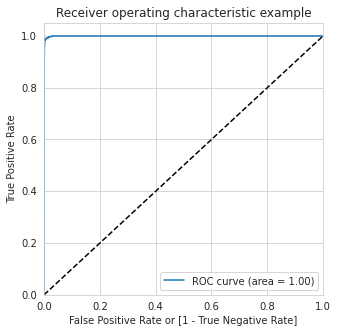

In [64]:
# Predicted probability
y_train_pred_proba_rfc = rfc.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_rfc)

### Evaluating the model on the test set

In [65]:
y_test_pred_rfc = rfc.predict(X_test)
display_scores(y_test, y_test_pred_rfc)

F1 Score: 83.92%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.82      0.84       147

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[85277    19]
 [   27   120]]


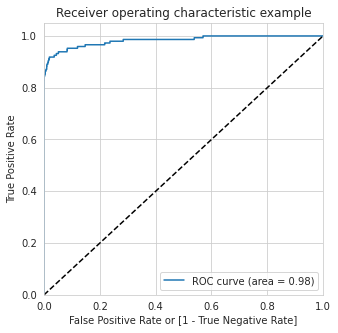

In [66]:
# Predicted probability
y_test_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_rfc)

In [67]:
# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_rfc)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_test_pred_rfc)

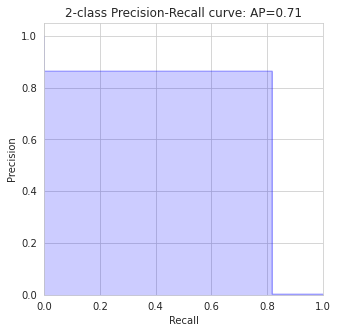

In [68]:
# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### Model Summary

- Train set
    - ROC : 100%
    - F1 Score: 85.09%
    
- Test set
    - ROC : 98%
    - F1 score: 83.92%

## Model 4: XGBoost Model  on unbalanced data 

In [69]:
xgb_model = xgb.XGBClassifier()
parameters = {'learning_rate': [0.1, 0.5],
              'max_depth': [4, 10],
              'min_child_weight': [3, 7, 11]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)


clf_xgb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [4, 10],
                         'min_child_weight': [3, 7, 11]},
             pre_dispatch='2*n_jobs', refit=T

In [70]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 11}
0.9840853629764705
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=11, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


#### XGBoost with optimal hyperparameters

In [71]:
model = xgb.XGBClassifier(learning_rate= 0.1, max_depth=4,
                          min_child_weight= 11,
                               n_jobs = 1,
                               random_state = 5,
                          n_estimators=100)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=11, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Prediction on Train set

In [72]:
y_train_pred_xgb = model.predict(X_train)
display_scores(y_train, y_train_pred_xgb)

F1 Score: 89.66%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       0.98      0.83      0.90       345

    accuracy                           1.00    199364
   macro avg       0.99      0.91      0.95    199364
weighted avg       1.00      1.00      1.00    199364


Confusion matrix:
 [[199012      7]
 [    59    286]]


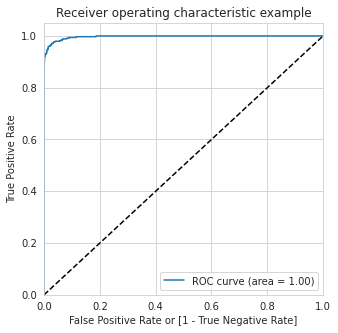

In [73]:
# Predicted probability
y_train_pred_proba_xgb = model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_xgb)

### Evaluate on Test Set

In [74]:
y_test_pred_xgb = model.predict(X_test)
display_scores(y_test, y_test_pred_xgb)


F1 Score: 83.9%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[85288     8]
 [   35   112]]


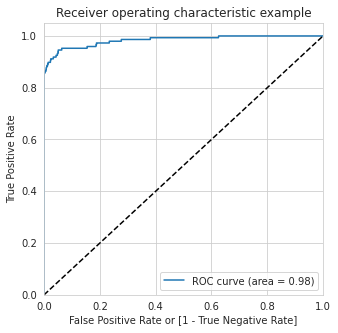

In [75]:
# Predicted probability
y_test_pred_proba_xgb = model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_xgb)

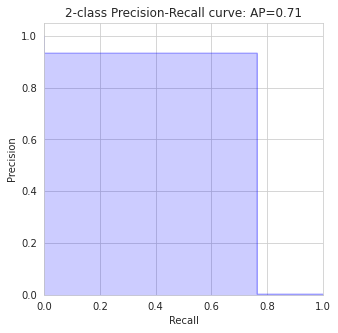

In [76]:
# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_xgb)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_test_pred_xgb)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

#### Model Summary

- Train set
    - ROC : 100%
    - F1 Score: 89.66%
    
- Test set
    - ROC : 98%
    - F1 score: 83.9%

####Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

## Model Building using Resampling techniques

We are going to perform below over sampling approaches for handling data imbalance and we will pick the best approach based on model performance.

    Random Undersampling
    Random Oversampling
    SMOTE
    ADASYN

## Random Undersampling

In [77]:

# define oversampling strategy
undersampler = RandomUnderSampler()
# fit and apply the transform
X_under, y_under = undersampler.fit_resample(X_train, y_train)

## Model 1: Logistic Regression on balanced data with Random Undersampling

In [78]:

# Fit a logistic regression model to our data
rus_model = LogisticRegression().fit(X_under, y_under)


F1 Score: 9.01%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.05      0.91      0.09       147

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443


Confusion matrix:
 [[82603  2693]
 [   13   134]]


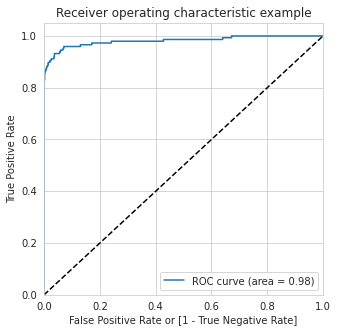

In [79]:
y_rus = rus_model.predict(X_test)
# Predicted probability
y_test_rus_prob = rus_model.predict_proba(X_test)[:,1]

#display report
display_scores(y_test, y_rus)

# Plot the ROC curve
draw_roc(y_test, y_test_rus_prob)


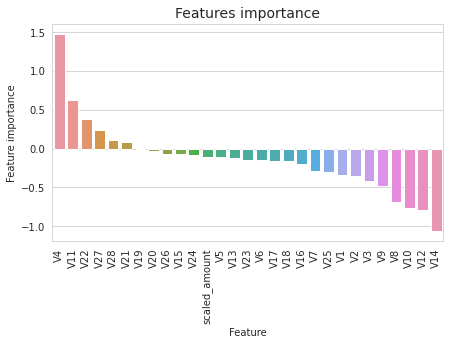

In [80]:
tmp = pd.DataFrame({'Feature': cols, 'Feature importance': rus_model.coef_[0]})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

plt.show() 

## Model 2: Decision Tree on balanced data with Random Undersampling

In [81]:
# Resample your training data
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
rus_model_dt = DecisionTreeClassifier().fit(X_train_rus, y_train_rus)

F1 Score: 2.89%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     85296
           1       0.01      0.89      0.03       147

    accuracy                           0.90     85443
   macro avg       0.51      0.89      0.49     85443
weighted avg       1.00      0.90      0.94     85443


Confusion matrix:
 [[76507  8789]
 [   16   131]]


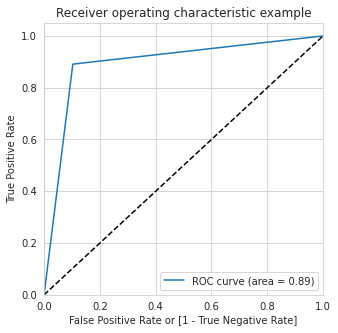

In [82]:
y_rus_dt = rus_model_dt.predict(X_test)
# Predicted probability
y_test_rus_prob_dt = rus_model_dt.predict_proba(X_test)[:,1]

#display report
display_scores(y_test, y_rus_dt)

# Plot the ROC curve
draw_roc(y_test, y_test_rus_prob_dt)

## Model 3: Random Forest on balanced data with Random Undersampling

In [83]:
# Resample your training data
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
# Fit a logistic regression model to our data
rus_model_rf = RandomForestClassifier(random_state=5).fit(X_train_rus, y_train_rus)

F1 Score: 13.29%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.88      0.13       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443


Confusion matrix:
 [[83617  1679]
 [   17   130]]


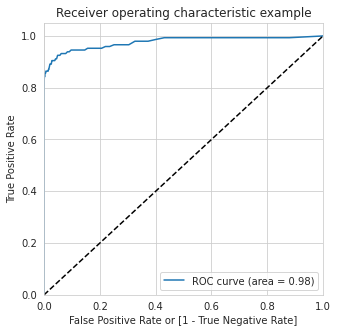

In [84]:
y_rus_rf = rus_model_rf.predict(X_test)
# Predicted probability
y_test_rus_prob_rf = rus_model_rf.predict_proba(X_test)[:,1]

#display report
display_scores(y_test, y_rus_rf)

# Plot the ROC curve
draw_roc(y_test, y_test_rus_prob_rf)

## Model 4: XGBoost on balanced data with Random Undersampling

In [85]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

F1 Score: 11.92%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.90      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443


Confusion matrix:
 [[83344  1952]
 [   14   133]]


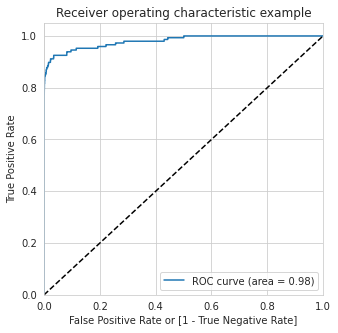

In [86]:
# Fit a logistic regression model to our data
rus_model_xgb = xgb.XGBClassifier().fit(X_train_rus, y_train_rus)
y_rus_xgb = rus_model_xgb.predict(X_test)
# Predicted probability
y_test_rus_prob_rgb = rus_model_xgb.predict_proba(X_test)[:,1]

#display report
display_scores(y_test, y_rus_xgb)

# Plot the ROC curve
draw_roc(y_test, y_test_rus_prob_rgb)

## Random Over Sampling


In [87]:
# Define oversampling strategy
oversample = RandomOverSampler()
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [88]:
# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({'Class': 1})
New class distribution:- Counter({0: 199019, 1: 199019})


## Logistic Regression on balanced data with Random Oversampling

In [89]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


Best ROC AUC score:  0.9866260250837542
Best hyperparameters:  {'C': 0.1}


In [90]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.193547,0.087480,0.042586,0.005594,0.01,{'C': 0.01},0.986915,0.986050,0.986824,0.986574,0.986717,0.986616,0.000305,6,0.986642,0.986740,0.986504,0.986646,0.986614,0.986629,0.000076
1,2.274833,0.041724,0.040427,0.000788,0.1,{'C': 0.1},0.986926,0.986061,0.986821,0.986584,0.986738,0.986626,0.000304,1,0.986650,0.986761,0.986509,0.986655,0.986627,0.986640,0.000080
2,2.289565,0.090870,0.041742,0.002277,1,{'C': 1},0.986926,0.986061,0.986819,0.986580,0.986737,0.986625,0.000304,4,0.986649,0.986760,0.986509,0.986654,0.986629,0.986640,0.000080
3,2.280869,0.117349,0.044435,0.005026,10,{'C': 10},0.986926,0.986062,0.986819,0.986580,0.986739,0.986625,0.000303,2,0.986649,0.986760,0.986509,0.986654,0.986629,0.986640,0.000080
4,2.254545,0.115413,0.040972,0.002299,100,{'C': 100},0.986926,0.986062,0.986819,0.986580,0.986738,0.986625,0.000303,3,0.986649,0.986760,0.986509,0.986654,0.986629,0.986640,0.000080
5,2.327585,0.143031,0.041888,0.001158,1000,{'C': 1000},0.986926,0.986061,0.986819,0.986580,0.986738,0.986625,0.000303,5,0.986649,0.986760,0.986509,0.986654,0.986629,0.986640,0.000080


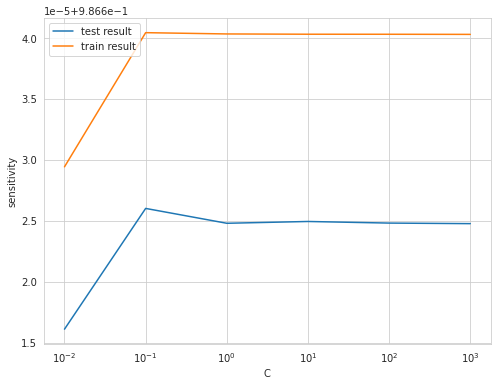

In [91]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

####Logistic Regression with hyperparameter tuning

In [92]:
model_cv.best_params_

{'C': 0.1}

In [93]:
# Instantiating the model
logreg_over = LogisticRegression(C=0.1)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

#### Predicting on Train Data

F1 Score: 94.76%

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    199019
           1       0.97      0.92      0.95    199019

    accuracy                           0.95    398038
   macro avg       0.95      0.95      0.95    398038
weighted avg       0.95      0.95      0.95    398038


Confusion matrix:
 [[194005   5014]
 [ 15320 183699]]


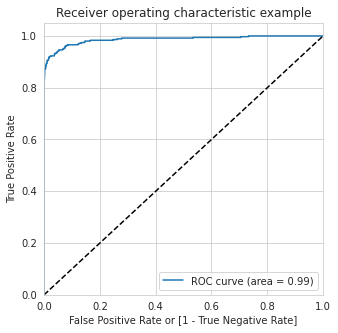

In [94]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)
# Printing scores
display_scores(y_over, y_train_pred)
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on Test data

F1 Score: 11.33%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443


Confusion matrix:
 [[83195  2101]
 [   12   135]]


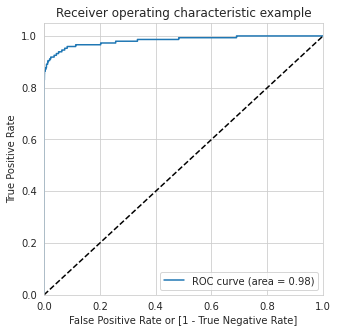

In [95]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 99%
    - F1 score: 94.66%
- Test set
    - ROC score: 98%
    - F1 score: 11.33%

## Model 2: Decision Tree on balanced data with Random Oversampling

In [96]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [97]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.999264840663375
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### Decision Tree with optimal parameters

In [98]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

#### Model evatuation on train data

F1 Score: 99.51%

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    199019
           1       1.00      0.99      1.00    199019

    accuracy                           1.00    398038
   macro avg       1.00      1.00      1.00    398038
weighted avg       1.00      1.00      1.00    398038


Confusion matrix:
 [[198244    775]
 [  1172 197847]]


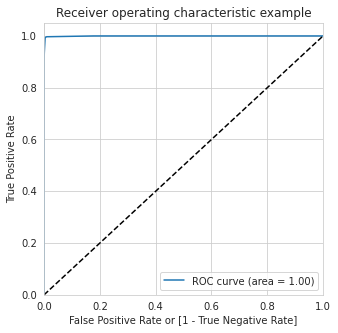

In [99]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

####Evaluating Test Set

F1 Score: 39.61%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.26      0.82      0.40       147

    accuracy                           1.00     85443
   macro avg       0.63      0.91      0.70     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[84953   343]
 [   26   121]]


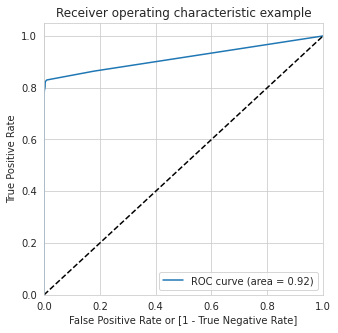

In [100]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 99.5.0%
- Test set
    - ROC score: 92%
    - F1 score: 38.17%

## Model 3: Random Forest on balanced data with Random Oversampling

In [101]:
# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Fit a logistic regression model to our data
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_over, y_over)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=5,
                                   

In [102]:
# cv results
cv_results = pd.DataFrame(CV_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.820665,0.012728,0.061736,0.001958,gini,4,auto,1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.919330,0.918501,0.909054,0.919805,0.910637,0.915465,0.004634,10
1,21.606680,0.093463,0.228131,0.006958,gini,4,auto,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.915335,0.913752,0.908100,0.914881,0.908150,0.912044,0.003241,11
2,0.663169,0.008127,0.058402,0.001567,gini,4,log2,1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.911542,0.913677,0.911441,0.910560,0.909959,0.911436,0.001264,12
3,17.866655,0.191076,0.228451,0.013283,gini,4,log2,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.905763,0.905361,0.908175,0.910183,0.905839,0.907064,0.001847,13
4,1.348947,0.006241,0.062894,0.003968,gini,8,auto,1,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.969475,0.960331,0.958899,0.959450,0.959074,0.961446,0.004045,8
5,37.029365,0.293236,0.263637,0.008103,gini,8,auto,30,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.985805,0.980831,0.975605,0.973947,0.972792,0.977796,0.004858,3
6,1.122561,0.015502,0.063469,0.006173,gini,8,log2,1,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.963295,0.960657,0.962893,0.962666,0.970581,0.964019,0.003405,7
7,30.453234,0.352197,0.274423,0.009982,gini,8,log2,30,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.974701,0.978394,0.976058,0.976761,0.979374,0.977057,0.001661,5
8,1.071403,0.022405,0.065732,0.009957,entropy,4,auto,1,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.899307,0.860089,0.860316,0.924553,0.860491,0.880951,0.026524,16
9,30.318492,0.148097,0.234189,0.012462,entropy,4,auto,30,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.902648,0.899734,0.902547,0.906439,0.903301,0.902934,0.002140,15


In [103]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", CV_model.best_score_)
print(CV_model.best_estimator_)

Best roc auc score :  0.9829815099085637
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)


In [104]:
# Build a RandomForestClassifier using the GridSearchCV parameters
rfc = RandomForestClassifier(bootstrap=True,
                               class_weight = {0:1,1:12},
                               criterion = 'entropy',
                               n_estimators = 30,
                               max_features = 'auto',
                               min_samples_split=2,
                               min_samples_leaf = 10,
                               max_depth = 8,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
rfc.fit(X_over,y_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 12}, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)

F1 Score: 99.59%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    199019
           1       0.99      1.00      1.00    199019

    accuracy                           1.00    398038
   macro avg       1.00      1.00      1.00    398038
weighted avg       1.00      1.00      1.00    398038


Confusion matrix:
 [[197370   1649]
 [     0 199019]]


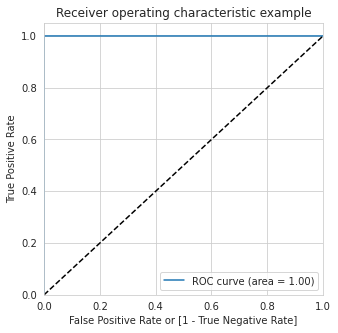

In [105]:
# Predictions on the train set
y_train_pred = rfc.predict(X_over)
display_scores(y_over, y_train_pred)
# Predicted probability
y_train_pred_proba = rfc.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

F1 Score: 25.51%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.15      0.86      0.26       147

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.63     85443
weighted avg       1.00      0.99      0.99     85443


Confusion matrix:
 [[84581   715]
 [   21   126]]


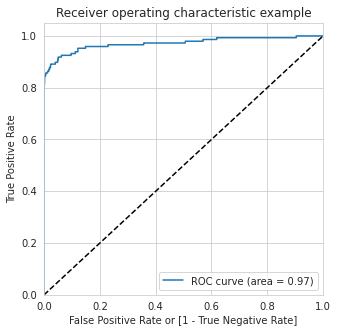

In [106]:
# Evaluating model on the test data
y_test_pred = rfc.predict(X_test)
display_scores(y_test, y_test_pred)
# Predicted probability
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 99.95%
- Test set
    - ROC score: 97%
    - F1 score: 25.51%

## Model 4: XGBoost on balanced data with Random Oversampling

In [107]:
xgb_model = xgb.XGBClassifier()
parameters = {'learning_rate': [0.1],
              'max_depth': [8, 10, 15],
              'min_child_weight': [7],
              'max_features': [5, 10, 15],
              'min_samples_split': [500, 1000],
              'min_samples_leaf': [5, 10],
              'bootstrap': [True, False],
              'criterion': ["gini", "entropy"]
             }

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)


clf_xgb.fit(X_over, y_over)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'learning_rate': [0.1], 'max_depth': [8, 10, 15],
                         'max_features': [5, 10, 15], 'min_child_weight': [7],
         

In [108]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'bootstrap': True, 'criterion': 'gini', 'learning_rate': 0.1, 'max_depth': 8, 'max_features': 5, 'min_child_weight': 7, 'min_samples_leaf': 5, 'min_samples_split': 500}
0.9999861623160938
XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=8, max_features=5, min_child_weight=7,
              min_samples_leaf=5, min_samples_split=500, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)


In [109]:
xgb_over_model = xgb.XGBClassifier(learning_rate= 0.1, max_depth=4,
                          min_child_weight= 11,
                               n_jobs = 1,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
xgb_over_model.fit(X_over,y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=11, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

F1 Score: 99.92%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       1.00      1.00      1.00    199019

    accuracy                           1.00    398038
   macro avg       1.00      1.00      1.00    398038
weighted avg       1.00      1.00      1.00    398038


Confusion matrix:
 [[198714    305]
 [     0 199019]]


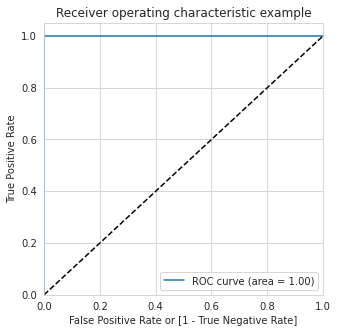

In [110]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

F1 Score: 65.46%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.53      0.86      0.65       147

    accuracy                           1.00     85443
   macro avg       0.76      0.93      0.83     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[85182   114]
 [   20   127]]


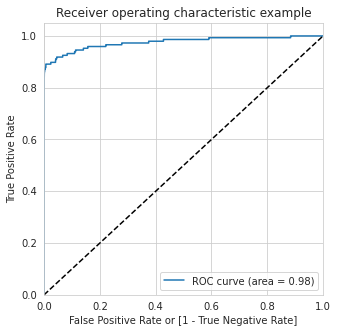

In [111]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 99.92%
- Test set
    - ROC score: 98%
    - F1 score: 65.46%

## SMOTE 



In [112]:

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]


## Model 1: Logistic Regression on balanced data with SMOTE

In [113]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min finished


Best ROC AUC score:  0.9896175489008394
Best hyperparameters:  {'C': 0.1}


In [114]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.987243,0.081878,0.041760,0.000626,0.01,{'C': 0.01},0.989387,0.989576,0.989791,0.989726,0.989530,0.989602,0.000144,6,0.989668,0.989634,0.989561,0.989610,0.989612,0.989617,0.000035
1,2.021768,0.097639,0.042260,0.001822,0.1,{'C': 0.1},0.989414,0.989592,0.989780,0.989753,0.989548,0.989618,0.000135,1,0.989686,0.989660,0.989570,0.989620,0.989634,0.989634,0.000039
2,2.031831,0.123451,0.042950,0.001773,1,{'C': 1},0.989415,0.989593,0.989776,0.989754,0.989549,0.989617,0.000134,2,0.989686,0.989662,0.989569,0.989619,0.989635,0.989634,0.000040
3,2.037858,0.140859,0.041941,0.000257,10,{'C': 10},0.989415,0.989593,0.989776,0.989754,0.989549,0.989617,0.000134,5,0.989686,0.989662,0.989569,0.989619,0.989635,0.989634,0.000040
4,2.079344,0.177034,0.043501,0.001861,100,{'C': 100},0.989415,0.989593,0.989776,0.989754,0.989549,0.989617,0.000134,4,0.989686,0.989662,0.989569,0.989619,0.989635,0.989634,0.000040
5,2.051555,0.136524,0.042883,0.001334,1000,{'C': 1000},0.989415,0.989593,0.989776,0.989754,0.989549,0.989617,0.000134,3,0.989686,0.989662,0.989569,0.989619,0.989635,0.989634,0.000040


In [115]:
# Printing best params
model_cv.best_params_

{'C': 0.1}

In [116]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=0.1)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

F1 Score: 94.42%

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    199019
           1       0.97      0.92      0.94    199019

    accuracy                           0.95    398038
   macro avg       0.95      0.95      0.95    398038
weighted avg       0.95      0.95      0.95    398038


Confusion matrix:
 [[193629   5390]
 [ 16215 182804]]


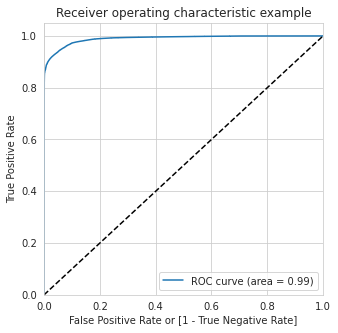

In [117]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

F1 Score: 10.62%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.98     85443


Confusion matrix:
 [[83035  2261]
 [   12   135]]


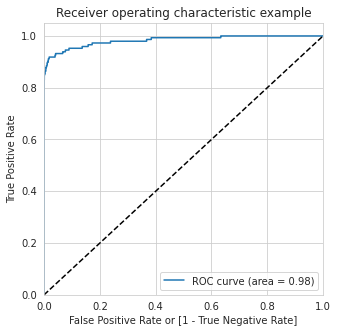

In [118]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

#### Model Summary

- Train set
    - ROC score: 99%
    - F1 score: 94.42%
- Test set
    - ROC score: 98%
    - F1 score: 10.62%

## Model 2: Decision Tree on balanced data with SMOTE

In [119]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [120]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9978771749460282
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [121]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}

In [122]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

F1 Score: 98.65%

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    199019
           1       0.98      0.99      0.99    199019

    accuracy                           0.99    398038
   macro avg       0.99      0.99      0.99    398038
weighted avg       0.99      0.99      0.99    398038


Confusion matrix:
 [[195778   3241]
 [  2135 196884]]


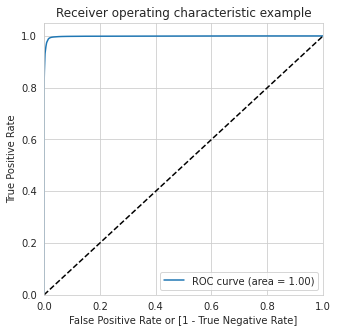

In [123]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

F1 Score: 14.91%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.87      0.15       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443


Confusion matrix:
 [[83854  1442]
 [   19   128]]


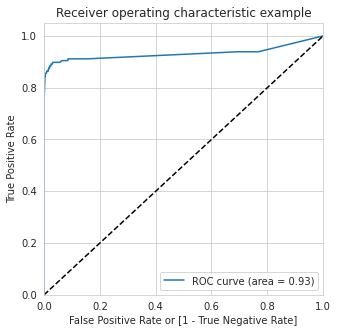

In [124]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 98.65%
- Test set
    - ROC score: 93%
    - F1 score: 14.91%

## Model 3: RandomForest on balanced data with SMOTE

In [125]:
# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Fit a logistic regression model to our data
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=5,
                                   

In [126]:
# cv results
cv_results = pd.DataFrame(CV_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.092057,0.024300,0.063734,0.003371,gini,4,auto,1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.897397,0.898955,0.897648,0.896566,0.885414,0.895196,0.004951,9
1,29.969288,0.323860,0.220740,0.006405,gini,4,auto,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.897623,0.899080,0.891242,0.892596,0.894031,0.894915,0.002978,10
2,0.885491,0.012369,0.059762,0.004592,gini,4,log2,1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.888730,0.890438,0.889584,0.887898,0.889609,0.889252,0.000866,11
3,24.743724,0.205862,0.215240,0.006245,gini,4,log2,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.885991,0.886896,0.885916,0.885888,0.887448,0.886428,0.000633,12
4,1.891986,0.026798,0.059030,0.000967,gini,8,auto,1,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.933198,0.937242,0.947744,0.946361,0.965079,0.945925,0.011025,5
5,54.353732,0.586651,0.260634,0.005234,gini,8,auto,30,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.960280,0.954728,0.951236,0.956712,0.956311,0.955853,0.002937,1
6,1.583429,0.030591,0.060704,0.001207,gini,8,log2,1,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.949276,0.947216,0.950432,0.947316,0.939328,0.946714,0.003887,4
7,44.486960,0.390065,0.265899,0.007726,gini,8,log2,30,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.947317,0.947568,0.947970,0.950682,0.947870,0.948281,0.001222,3
8,1.596443,0.025604,0.057742,0.000499,entropy,4,auto,1,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.858959,0.859160,0.858858,0.857599,0.859637,0.858843,0.000677,15
9,46.449648,0.357588,0.221186,0.007758,entropy,4,auto,30,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.884961,0.885690,0.885037,0.884330,0.885087,0.885021,0.000432,13


#### Model on optimal hyperparameters

In [127]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", CV_model.best_score_)
print(CV_model.best_estimator_)


Best roc auc score :  0.955853465540175
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)


In [128]:
# Build a RandomForestClassifier using the GridSearchCV parameters
rfc = RandomForestClassifier(bootstrap=True,
                               criterion = 'gini',
                               n_estimators = 30,
                               max_features = 'auto',
                               min_samples_split=2,
                               min_samples_leaf = 1,
                               max_depth = 8,
                               random_state = 5)
# Fit the model to your training data and get the predicted results
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

#### Model Evalution on Train set

F1 Score: 97.71%

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    199019
           1       1.00      0.96      0.98    199019

    accuracy                           0.98    398038
   macro avg       0.98      0.98      0.98    398038
weighted avg       0.98      0.98      0.98    398038


Confusion matrix:
 [[198669    350]
 [  8567 190452]]


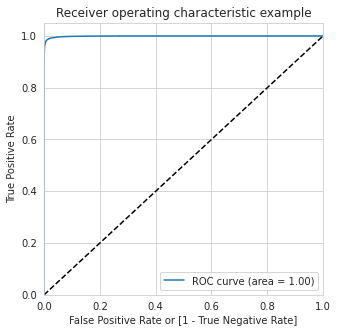

In [129]:
# Predictions on the train set
y_train_pred = rfc.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)
# Predicted probability
y_train_pred_proba = rfc.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)


#### Model evalution on Test set

F1 Score: 61.23%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.48      0.84      0.61       147

    accuracy                           1.00     85443
   macro avg       0.74      0.92      0.81     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[85162   134]
 [   23   124]]


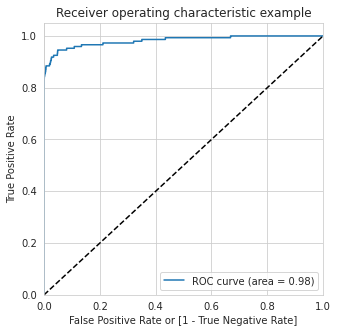

In [130]:
# Evaluating model on the test data
y_test_pred = rfc.predict(X_test)
display_scores(y_test, y_test_pred)
# Predicted probability
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 97.73%
- Test set
    - ROC score: 97%
    - F1 score: 6.34%

## Model 4: XGBoost on balanced data with SMOTE

In [131]:
from xgboost import XGBClassifier
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 20.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [132]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,55.849442,0.173743,0.606276,0.037212,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999702,0.999734,0.999716,0.999717,0.000013,4,0.999745,0.999757,0.999749,0.999750,0.000005
1,70.778971,0.071006,0.578624,0.001310,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999677,0.999710,0.999717,0.999702,0.000017,6,0.999739,0.999727,0.999759,0.999741,0.000013
2,74.303602,0.194693,0.583845,0.008449,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999693,0.999723,0.999707,0.999708,0.000012,5,0.999747,0.999746,0.999754,0.999749,0.000004
3,55.660925,0.137279,0.614417,0.024730,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999963,0.999959,0.999956,0.999959,0.000003,3,0.999979,0.999983,0.999983,0.999982,0.000002
4,70.602642,0.024333,0.594735,0.001978,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999973,0.999967,0.999954,0.999965,0.000008,1,0.999984,0.999987,0.999985,0.999985,0.000001
5,74.013844,0.203600,0.611254,0.023560,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999965,0.999968,0.999957,0.999963,0.000005,2,0.999988,0.999987,0.999985,0.999987,0.000001


In [133]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999648959196564
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [134]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [135]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

F1 Score: 98.46%

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    199019
           1       0.99      0.98      0.98    199019

    accuracy                           0.98    398038
   macro avg       0.98      0.98      0.98    398038
weighted avg       0.98      0.98      0.98    398038


Confusion matrix:
 [[197045   1974]
 [  4109 194910]]


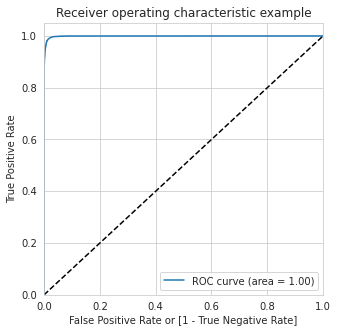

In [136]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

F1 Score: 24.11%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.14      0.88      0.24       147

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.62     85443
weighted avg       1.00      0.99      0.99     85443


Confusion matrix:
 [[84502   794]
 [   18   129]]


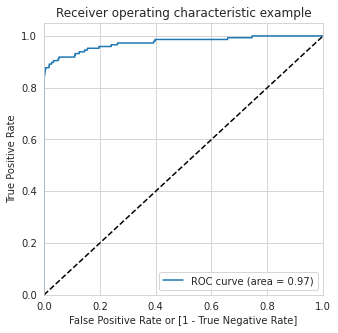

In [137]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 98.46%
- Test set
    - ROC score: 97%
    - F1 score: 24.11%

## Model 4: ADASYN

In [138]:
from imblearn import over_sampling
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

## Model 1: Logistic Regression on balanced data with ADASYN

In [139]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   33.2s finished


Best ROC AUC score:  0.9631116547660034
Best hyperparameters:  {'C': 1000}


In [140]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.636138,0.019238,0.073849,0.005586,0.01,{'C': 0.01},0.963270,0.962906,0.962977,0.963051,0.000157,6,0.963160,0.963023,0.963094,0.963092,0.000056
1,1.613211,0.069367,0.067585,0.001460,0.1,{'C': 0.1},0.963318,0.962958,0.963052,0.963109,0.000153,5,0.963237,0.963063,0.963152,0.963151,0.000071
2,1.604987,0.072266,0.069593,0.003316,1,{'C': 1},0.963319,0.962959,0.963057,0.963112,0.000152,4,0.963241,0.963063,0.963154,0.963153,0.000073
3,1.648752,0.082370,0.069411,0.001531,10,{'C': 10},0.963319,0.962959,0.963057,0.963112,0.000152,3,0.963241,0.963062,0.963154,0.963153,0.000073
4,1.640790,0.065356,0.068404,0.002119,100,{'C': 100},0.963319,0.962959,0.963057,0.963112,0.000152,2,0.963241,0.963062,0.963155,0.963153,0.000073
5,1.638537,0.087978,0.067255,0.000119,1000,{'C': 1000},0.963319,0.962959,0.963057,0.963112,0.000152,1,0.963241,0.963062,0.963155,0.963153,0.000073


In [141]:
model_cv.best_params_

{'C': 1000}

#### Model with optimal hyperparameter

In [142]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evalution on Train set

F1 Score: 89.33%

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    199019
           1       0.90      0.88      0.89    198982

    accuracy                           0.89    398001
   macro avg       0.89      0.89      0.89    398001
weighted avg       0.89      0.89      0.89    398001


Confusion matrix:
 [[180214  18805]
 [ 23180 175802]]


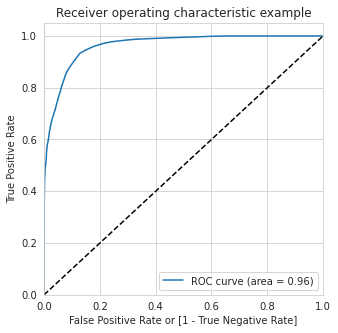

In [143]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Model Evalution on Test set

F1 Score: 3.42%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.95      0.03       147

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443


Confusion matrix:
 [[77403  7893]
 [    7   140]]


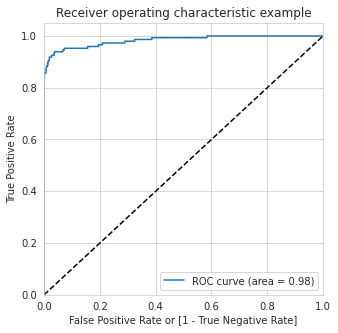

In [144]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 96%
    - F1 score: 89.33%
- Test set
    - ROC score: 98%
    - F1 score: 3.42%

## Model 2: Decision Tree on balanced data with ADASYN

In [145]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [146]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9353407515010798
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### Model with optimal hyperparameters

In [147]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

#### Model Evalution on Train set

F1 Score: 97.69%

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    199019
           1       0.97      0.99      0.98    198982

    accuracy                           0.98    398001
   macro avg       0.98      0.98      0.98    398001
weighted avg       0.98      0.98      0.98    398001


Confusion matrix:
 [[192053   6966]
 [  2334 196648]]


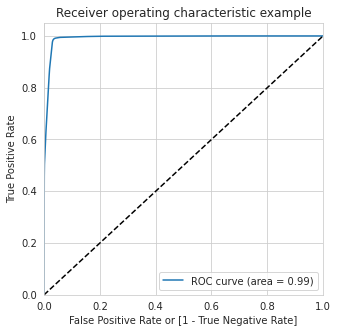

In [148]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Model Evalution on Test set

F1 Score: 7.85%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.87      0.08       147

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.96      0.98     85443


Confusion matrix:
 [[82309  2987]
 [   19   128]]


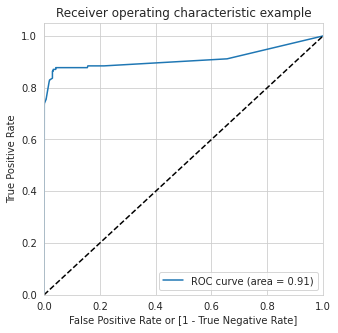

In [149]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 99%
    - F1 score: 97.65%
- Test set
    - ROC score: 91%
    - F1 score: 7.85%

## Model 3: RandomForest on balanced data with ADASYN

In [150]:
# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']


# Fit a logistic regression model to our data
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train_adasyn, y_train_adasyn)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=5,
                                   

In [151]:
# cv results
cv_results = pd.DataFrame(CV_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.089136,0.006171,0.065403,0.003153,gini,4,auto,1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.721713,0.869811,0.637350,0.782265,0.836294,0.769487,0.082987,13
1,30.345257,0.219856,0.224608,0.004189,gini,4,auto,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.709953,0.842748,0.714117,0.791461,0.858356,0.783327,0.062290,11
2,0.876362,0.010524,0.060068,0.001168,gini,4,log2,1,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.720054,0.875942,0.643783,0.795105,0.945398,0.796057,0.107377,10
3,24.729201,0.138251,0.229389,0.003668,gini,4,log2,30,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.700430,0.840311,0.677028,0.792065,0.834209,0.768808,0.067867,14
4,1.787203,0.032113,0.063687,0.001092,gini,8,auto,1,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.789180,0.918283,0.830033,0.852322,0.915722,0.861108,0.049936,3
5,52.664307,0.137341,0.280557,0.016203,gini,8,auto,30,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.754906,0.967484,0.805885,0.850236,0.913385,0.858379,0.075443,4
6,1.498459,0.021926,0.060660,0.001136,gini,8,log2,1,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.830314,0.932556,0.863906,0.878832,0.944795,0.890081,0.042852,1
7,43.056969,0.321416,0.262420,0.005589,gini,8,log2,30,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.729678,0.948739,0.769751,0.855262,0.906149,0.841916,0.081878,7
8,1.612961,0.032678,0.061354,0.002661,entropy,4,auto,1,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.776189,0.892150,0.764398,0.812041,0.835691,0.816094,0.045716,9
9,47.142485,0.186755,0.214824,0.003576,entropy,4,auto,30,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.692112,0.872726,0.676224,0.784551,0.867503,0.778623,0.083378,12


In [152]:

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", CV_model.best_score_)
print(CV_model.best_estimator_)

Best roc auc score :  0.8900805351860663
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)


#### Model with optimal hyperparameter

In [153]:
# Build a RandomForestClassifier using the GridSearchCV parameters
rfc = RandomForestClassifier(bootstrap=True,
                               class_weight = {0:1,1:12},
                               criterion = 'entropy',
                               n_estimators = 30,
                               max_features = 'auto',
                               min_samples_split=2,
                               min_samples_leaf = 10,
                               max_depth = 8,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
rfc.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 12}, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)

#### Model Evalution on Train set

F1 Score: 95.81%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    199019
           1       0.92      1.00      0.96    198982

    accuracy                           0.96    398001
   macro avg       0.96      0.96      0.96    398001
weighted avg       0.96      0.96      0.96    398001


Confusion matrix:
 [[181614  17405]
 [     0 198982]]


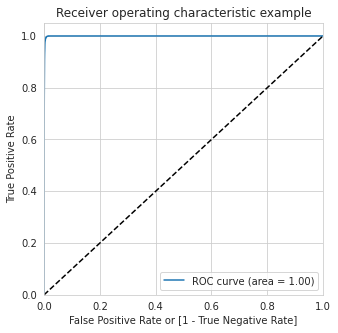

In [156]:
# Predictions on the train set
y_train_pred = rfc.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)
# Predicted probability
y_train_pred_proba = rfc.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Model Evalution on Test set

F1 Score: 3.54%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.93      0.04       147

    accuracy                           0.91     85443
   macro avg       0.51      0.92      0.50     85443
weighted avg       1.00      0.91      0.95     85443


Confusion matrix:
 [[77898  7398]
 [   11   136]]


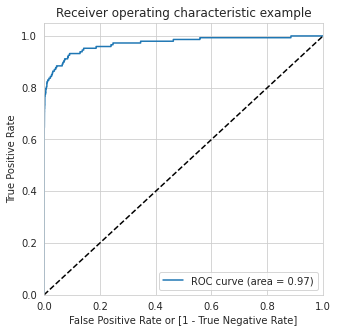

In [157]:
# Evaluating model on the test data
y_test_pred = rfc.predict(X_test)
display_scores(y_test, y_test_pred)
# Predicted probability
y_test_pred_proba = rfc.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 95.81%
    - F1 score: 96%
- Test set
    - ROC score: 97%
    - F1 score: 3.54%

## Model 4: XGBoost on balanced data with ADASYN

In [162]:
# specify model
xgb_model = XGBClassifier()

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1],
              'max_depth': [8, 10],
              'min_child_weight': [7],
              'max_features': [5, 10],
              'min_samples_split': [500],
              'min_samples_leaf': [5, 10],
              'bootstrap': [True, False],
              'criterion': ["gini", "entropy"]}         

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)



# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= scorer, 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        refit=True,
                        n_jobs=-1)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 104.3min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 217.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'learning_rate': [0.1], 'max_depth': [8, 10],
                         'max_features': [5, 10], 'min_child_weight': [7],
                 

In [163]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_learning_rate,param_max_depth,param_max_features,param_min_child_weight,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,247.663761,0.857020,1.150997,0.003517,True,gini,0.1,8,5,7,5,500,"{'bootstrap': True, 'criterion': 'gini', 'lear...",0.996612,0.995763,0.998018,0.996798,0.000930,17,0.999995,0.999995,0.999982,0.999991,0.000006
1,248.593608,1.692009,1.164298,0.014732,True,gini,0.1,8,5,7,10,500,"{'bootstrap': True, 'criterion': 'gini', 'lear...",0.996612,0.995763,0.998018,0.996798,0.000930,17,0.999995,0.999995,0.999982,0.999991,0.000006
2,246.646853,0.865888,1.201752,0.059692,True,gini,0.1,8,10,7,5,500,"{'bootstrap': True, 'criterion': 'gini', 'lear...",0.996612,0.995763,0.998018,0.996798,0.000930,17,0.999995,0.999995,0.999982,0.999991,0.000006
3,247.506099,0.870411,1.158746,0.015204,True,gini,0.1,8,10,7,10,500,"{'bootstrap': True, 'criterion': 'gini', 'lear...",0.996612,0.995763,0.998018,0.996798,0.000930,17,0.999995,0.999995,0.999982,0.999991,0.000006
4,293.652956,1.398788,1.268236,0.043038,True,gini,0.1,10,5,7,5,500,"{'bootstrap': True, 'criterion': 'gini', 'lear...",0.996241,0.997410,0.998405,0.997352,0.000884,1,1.000000,0.999999,0.999996,0.999998,0.000002
5,293.793029,1.390833,1.279039,0.030261,True,gini,0.1,10,5,7,10,500,"{'bootstrap': True, 'criterion': 'gini', 'lear...",0.996241,0.997410,0.998405,0.997352,0.000884,1,1.000000,0.999999,0.999996,0.999998,0.000002
6,293.757012,1.364652,1.293609,0.045563,True,gini,0.1,10,10,7,5,500,"{'bootstrap': True, 'criterion': 'gini', 'lear...",0.996241,0.997410,0.998405,0.997352,0.000884,1,1.000000,0.999999,0.999996,0.999998,0.000002
7,291.412390,1.292378,1.274426,0.013379,True,gini,0.1,10,10,7,10,500,"{'bootstrap': True, 'criterion': 'gini', 'lear...",0.996241,0.997410,0.998405,0.997352,0.000884,1,1.000000,0.999999,0.999996,0.999998,0.000002
8,248.178782,1.603577,1.171918,0.021231,True,entropy,0.1,8,5,7,5,500,"{'bootstrap': True, 'criterion': 'entropy', 'l...",0.996612,0.995763,0.998018,0.996798,0.000930,17,0.999995,0.999995,0.999982,0.999991,0.000006
9,245.170271,0.512842,1.183013,0.025715,True,entropy,0.1,8,5,7,10,500,"{'bootstrap': True, 'criterion': 'entropy', 'l...",0.996612,0.995763,0.998018,0.996798,0.000930,17,0.999995,0.999995,0.999982,0.999991,0.000006


In [164]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9973517932639138
XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=10, max_features=5, min_child_weight=7,
              min_samples_leaf=5, min_samples_split=500, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)


In [165]:
model_cv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'learning_rate': 0.1,
 'max_depth': 10,
 'max_features': 5,
 'min_child_weight': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 500}

#### XGBoost model with optimal hyperparameter

In [168]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.1,
          'max_depth': 10, 
          'n_jobs':-1,
          'objective':'binary:logistic',
          'max_features': 5,
          'min_child_weight': 7,
          'min_samples_leaf': 5,
          'min_samples_split': 500,
          'random_state': 5}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.1, 'max_depth': 10, 'max_features': 5,
                      'min_child_weight': 7, 'min_samples_leaf': 5,
                      'min_samples_split': 500, 'n_jobs': -1,
                      'objective': 'binary:logistic', 'random_state': 5},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

#### Model evaluation on train set

F1 Score: 98.12%

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    199019
           1       0.97      0.99      0.98    198982

    accuracy                           0.98    398001
   macro avg       0.98      0.98      0.98    398001
weighted avg       0.98      0.98      0.98    398001


Confusion matrix:
 [[193505   5514]
 [  2052 196930]]


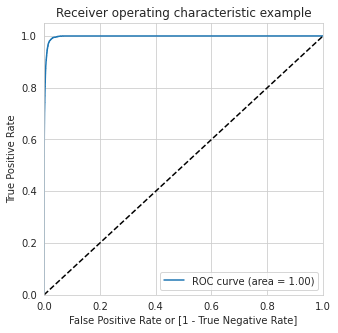

In [169]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Model evalution on test set

F1 Score: 10.18%

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.05      0.89      0.10       147

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443


Confusion matrix:
 [[83000  2296]
 [   16   131]]


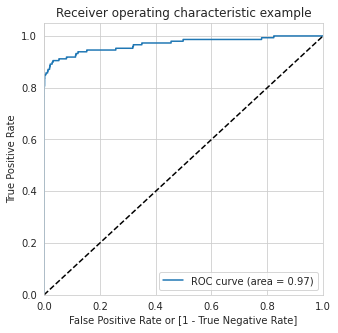

In [171]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 100.0%
- Test set
    - ROC score: 97%
    - F1 score: 10.18%

### Print the important features of the best model to understand the dataset

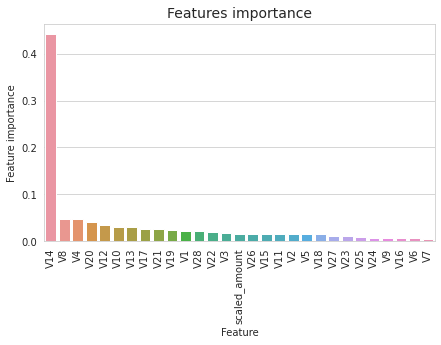

In [173]:
tmp = pd.DataFrame({'Feature': cols, 'Feature importance': xgb_over_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

### From the plot we can see V14, V8, V4, V20 seems to be most important features for model building

## Conclusion:

### Select the oversampling method which shows the best result on a model
- We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models. The data was split in 2 parts, a train set and a test set. 
- We have also used resampling techniques like SMOTE , ADASYN , Over Sampling and under sampling, since the data was highly imbalanced
We have used power transform to make data more Gaussian.
- We have used several balancing technique to solve the minority class imbalance. We have used Random Undersampling, Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, decision tree, random forest and XGBoost algorithms to build models on each sampling method.
- After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the  dataset which is balanced with Random Over sampling technique. We got ROC score 100% on train data and 98% on the test data and F1 score 99.9% on train data and 68.5% in the test data. 
- From the plot we can see V14, V8, V4, V20 seems to be most important features for model building

Hence, we conclude that the `XGBoost model with Random Oversampling` is the best model.